# Q1
Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men


In [1]:
import pandas as pd
from io import StringIO

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'  # Replace with the actual address

users = pd.read_csv(url)
users.columns = users.columns.str.replace('|', ',')
users = users.applymap(lambda x: x.replace('|', ','))
users = users.to_string(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, max_rows=None, max_cols=None, show_dimensions=False, decimal='.', line_width=None, min_rows=None, max_colwidth=None, encoding=None)
convertTocsv = pd.read_csv(StringIO(users))

mean_age_per_occupation = convertTocsv.groupby('occupation')['age'].mean()

male_ratio_per_occupation = convertTocsv[convertTocsv['gender'] == 'M'].groupby('occupation')['gender'].count() / convertTocsv.groupby('occupation')['gender'].count()
male_ratio_per_occupation_sorted = male_ratio_per_occupation.sort_values(ascending=False)

min_max_age_per_occupation = convertTocsv.groupby('occupation')['age'].agg(['min', 'max'])

mean_age_per_occupation_sex = convertTocsv.groupby(['occupation', 'gender'])['age'].mean()

gender_percentage_per_occupation = convertTocsv.groupby(['occupation', 'gender'])['gender'].count() / convertTocsv.groupby('occupation')['gender'].count() * 100

print("Mean Age per Occupation:\n", mean_age_per_occupation)
print("\nMale Ratio per Occupation (sorted):\n", male_ratio_per_occupation_sorted)
print("\nMinimum and Maximum Ages per Occupation:\n", min_max_age_per_occupation)
print("\nMean Age per Occupation and Sex:\n", mean_age_per_occupation_sex)
print("\nGender Percentage per Occupation:\n", gender_percentage_per_occupation)

Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation (sorted):
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other    

C:\Users\meetk\AppData\Local\Temp\ipykernel_23196\662122932.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  users.columns = users.columns.str.replace('|', ',')


# Q2 
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start
with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia


In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
goals = euro12['Goals']
num_teams = euro12['Team'].nunique()
num_columns = len(euro12.columns)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

mean_yellow_cards = discipline['Yellow Cards'].mean()

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]

first_7_columns = euro12.iloc[:, :7]
all_except_last_3_columns = euro12.iloc[:, :-3]
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print("Goals")
print(goals)
print("\n")
print("Number of teams:")
print( num_teams)
print("\n")
print("Number of columns:")
print( num_columns)
print("\n")
print("Discipline Sorted")
print(discipline_sorted)
print("\n")
print("Mean Yellow Cards per Team:")
print(mean_yellow_cards)
print("\n")
print("Teams More Than 6 Goals:")
print(teams_more_than_6_goals)
print("\n")
print("Teams Starting with G:")
print(teams_starting_with_G)
print("\n")
print("First 7 Columns:")
print(first_7_columns)
print("\n")
print("All Except Last 3 Columns:")
print(all_except_last_3_columns)
print("\n")
print("Shooting Accuracy:")
print(shooting_accuracy)

Goals
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


Number of teams:
16


Number of columns:
35


Discipline Sorted
                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark

# Q3
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299


In [4]:
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([series1, series2, series3], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)

print("Big Column Index : ", bigcolumn.index.max() == 99)

bigcolumn = bigcolumn.reset_index(drop=True)

print("Series 1:", series1)
print("Series 2:", series2)
print("Series 3:", series3)
print("\n")

print(df)
print("\n")

print(df)
print("\n")

print(bigcolumn)
print("\n")

print("Is the index only up to 99?", bigcolumn.index.max() == 99)
print("\n")

print(" Reindex the DataFrame :",bigcolumn)


Big Column Index :  False
Series 1: 0     4
1     2
2     4
3     1
4     3
     ..
95    3
96    1
97    1
98    3
99    3
Length: 100, dtype: int32
Series 2: 0     2
1     1
2     2
3     2
4     3
     ..
95    3
96    1
97    3
98    3
99    1
Length: 100, dtype: int32
Series 3: 0     19728
1     22297
2     26072
3     21357
4     19864
      ...  
95    19350
96    29602
97    20874
98    18309
99    15050
Length: 100, dtype: int32


    bedrs  bathrs  price_sqr_meter
0       4       2            19728
1       2       1            22297
2       4       2            26072
3       1       2            21357
4       3       3            19864
..    ...     ...              ...
95      3       3            19350
96      1       1            29602
97      1       3            20874
98      3       3            18309
99      3       1            15050

[100 rows x 3 columns]


    bedrs  bathrs  price_sqr_meter
0       4       2            19728
1       2       1            22297
2    

# Q4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are
average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper
datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it
and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be
datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire
record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and
all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean
windspeeds and standard deviations of the windspeeds at each location over all the
days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean
windspeed and standard deviations of the windspeeds across all the locations at each
day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the
windspeeds across all locations for each week (assume that the first week starts on
January 2 1961) for the first 52 weeks.

In [1]:
import pandas as pd

data = pd.read_csv('C:/Users/meetk/wind.txt', delim_whitespace=True, parse_dates=[[0, 1, 2]])

def fix_year(year):
    if year > 2000:
        year -= 100
    return year

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(lambda x: x.replace(year=fix_year(x.year)))

data.set_index('Yr_Mo_Dy', inplace=True)

missing_values_per_location = data.isnull().sum()

non_missing_count = data.count().sum()

mean_windspeed = data.mean().mean()

loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()

day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)

january_avg = data[data.index.month == 1].mean()

yearly_data = data.resample('Y').mean()

monthly_data = data.resample('M').mean()

weekly_data = data.resample('W-MON').mean()

weekly_stats = weekly_data.head(52).describe()

print("missing values per location:")
print(missing_values_per_location)
print("\nnon missing count:")
print(non_missing_count)
print("\nmean windspeed:")
print(mean_windspeed)
print("\nloc stats:")
print(loc_stats)
print("\nday stats:")
print(day_stats)
print("\njanuary avg:")
print(january_avg)
print("\nyearly data:")
print(yearly_data)
print("\nmonthly data:")
print(monthly_data)
print("\nweekly data:")
print(weekly_data)
print("\weekly stats:")
print(weekly_stats)

missing values per location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

non missing count:
78857

mean windspeed:
10.227982360836938

loc stats:
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

day stats:
             min    max       mean       std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126


# Q5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

print(chipo.head(10))

print("Number of observations:", len(chipo))

print("Number of columns:",  chipo.shape[1])

print("Column names:", chipo.columns.tolist())

print("Index type:", chipo.index)

print("Most-ordered item:", chipo['item_name'].value_counts().idxmax())

print("Number of items ordered:", chipo[chipo['item_name'] == chipo['item_name'].value_counts().idxmax()]['quantity'].sum())

print("Most ordered item in choice_description:", chipo['choice_description'].value_counts().idxmax())

print("Total items ordered:", chipo['quantity'].sum())

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("Item price type after conversion:", chipo['item_price'].dtype)

print("Total revenue:", (chipo['quantity'] * chipo['item_price']).sum())

print("Number of orders:", chipo['order_id'].nunique())

print("Average revenue per order:", ((chipo['quantity'] * chipo['item_price']).sum()) / (chipo['order_id'].nunique()))

print("Number of different items sold:", chipo['item_name'].nunique())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

# Q6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

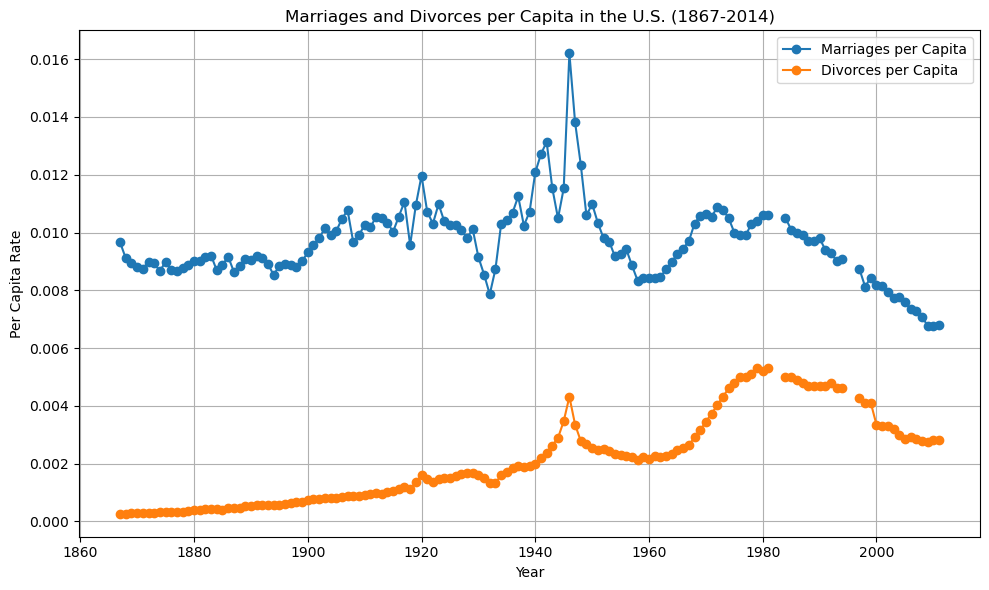

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/meetk/us-marriages-divorces-1867-2014.csv')

data['Marriages_per_capita'] = data['Marriages'] / data['Population']
data['Divorces_per_capita'] = data['Divorces'] / data['Population']

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_capita'], label='Marriages per Capita', marker='o')
plt.plot(data['Year'], data['Divorces_per_capita'], label='Divorces per Capita', marker='o')

plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()

# Q7
Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

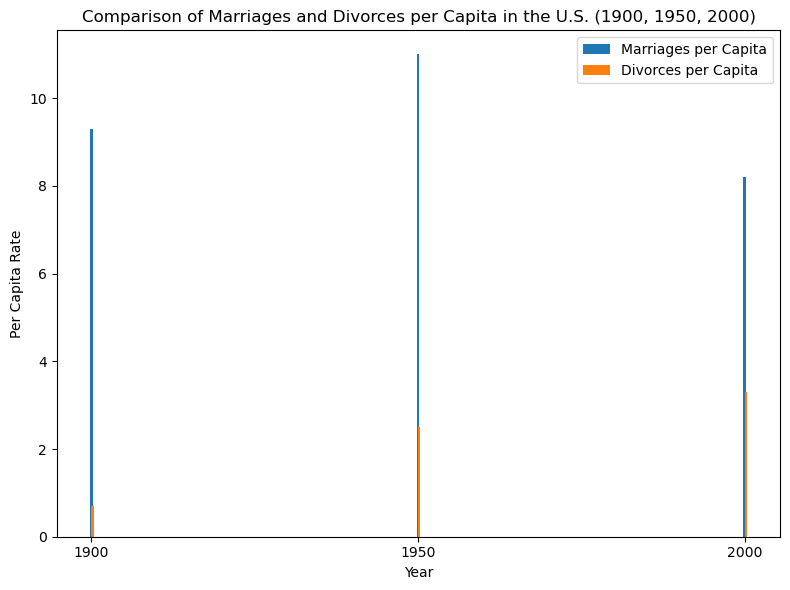

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/meetk/us-marriages-divorces-1867-2014.csv')

years_of_interest = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years_of_interest)]

plt.figure(figsize=(8, 6))
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_1000'], width=0.4, align='center', label='Marriages per Capita')
plt.bar(filtered_data['Year'], filtered_data['Divorces_per_1000'], width=0.4, align='edge', label='Divorces per Capita')

plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

plt.legend()

plt.xticks(years_of_interest)
plt.tight_layout()
plt.show()

# Q8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

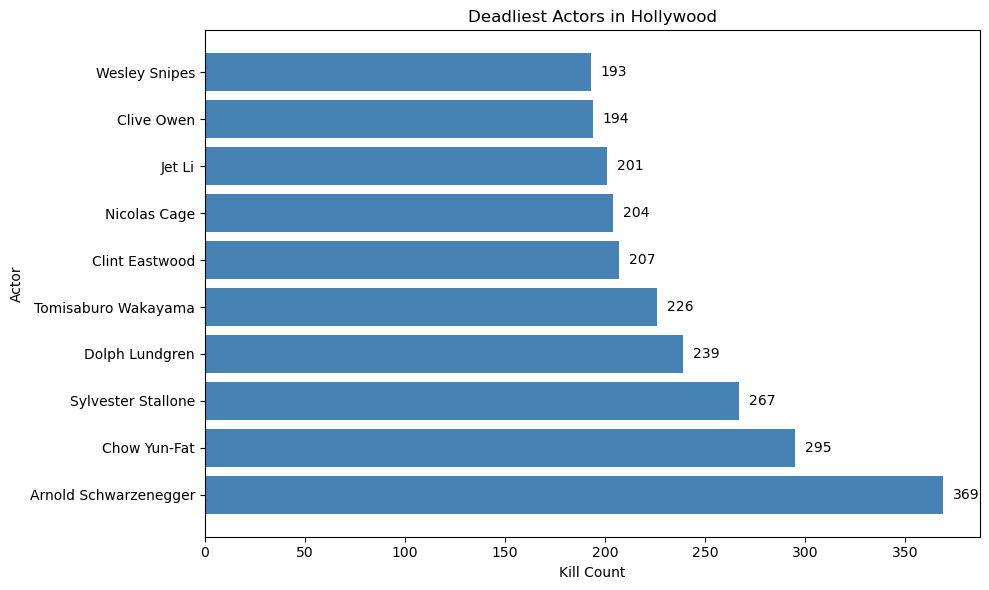

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/meetk/actor_kill_counts.csv')

data = data.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(data['Actor'], data['Count'], color='steelblue')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

for index, value in enumerate(data['Count']):
    plt.text(value + 5, index, str(value), va='center', color='black')

plt.tight_layout()
plt.show()

# Q9
Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

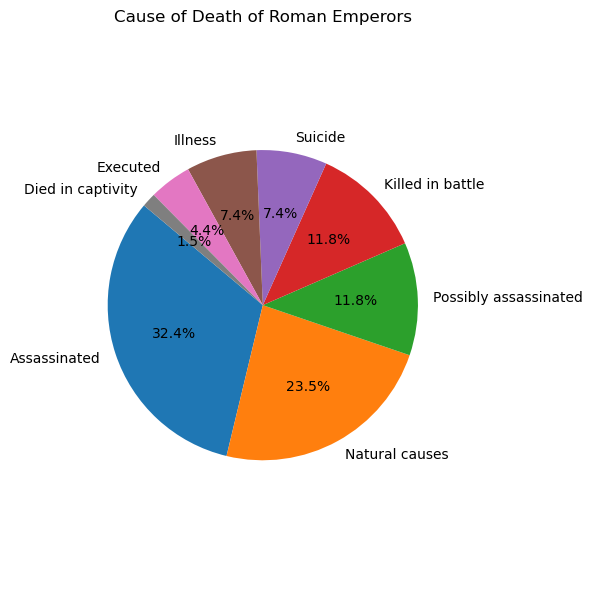

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/meetk/roman-emperor-reigns.csv')

cause_of_death_counts = data['Cause_of_Death'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(cause_of_death_counts, labels=cause_of_death_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.title('Cause of Death of Roman Emperors')

plt.tight_layout()
plt.show()

# Q10
Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

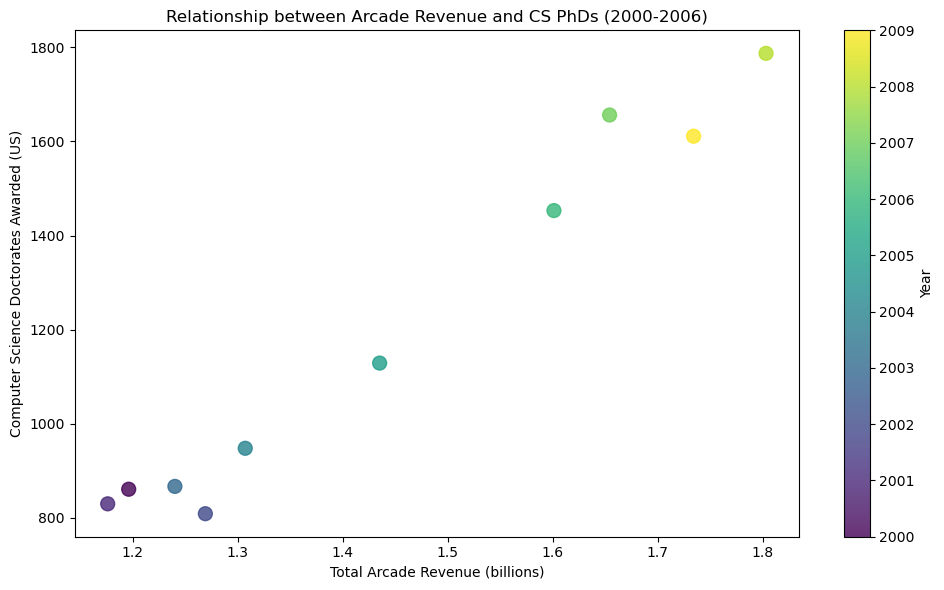

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/meetk/arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', s=100, alpha=0.8)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2006)')

cbar = plt.colorbar()
cbar.set_label('Year')

plt.tight_layout()
plt.show()